- Họ và tên : Phạm Ngọc Hải Anh
- Mã sinh viên: 11219417
- BFT63

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures

In [2]:
# Tách tập train và test
df_test = pd.read_csv('test.csv')
train_data = pd.read_csv('train.csv')


In [3]:
train_data['date']=pd.to_datetime(train_data['date'])
train_data.set_index('date', inplace = True)

In [4]:
train_data.tail(10)

,id,BFT0,BFT1,BFT2,BFT3,BFT4,BFT5,BFT6,BFT7,BFT8,...,BFT60,BFT61,BFT62,BFT63,BFT64,BFT65,BFT66,BFT67,BFT68,NEU
date,,,,,,,,,,,,,,,,,,,,,
2024-06-06,790,4.326447e+06,52766.68750,1.859861e+06,6.042327e+06,5.452366e+06,8.591342e+05,1.308249e+05,33393.5000,3.070016e+06,...,989294.565000,3.537678e+06,545112.9375,1.106840e+07,38500.180031,8.296524e+06,4.921985e+06,126183.75000,2.497691e+07,8.660265e+14
2024-06-07,791,4.578626e+06,169542.91875,2.319054e+06,3.509014e+06,1.044066e+07,1.198773e+06,6.739507e+05,31663.3625,5.611056e+06,...,362984.364975,5.047924e+06,512222.7375,1.386903e+07,258702.520625,1.121891e+07,6.322650e+06,190357.85000,2.898575e+07,3.136106e+15
2024-06-08,792,4.480025e+06,177562.50000,4.906482e+06,3.216137e+06,6.980717e+06,1.006372e+06,5.030386e+05,32548.6000,2.334469e+06,...,272393.169075,4.821280e+06,773756.5500,1.636949e+07,40783.578000,1.247911e+07,9.671750e+06,171465.00000,6.671879e+07,1.506071e+15
2024-06-09,793,4.925701e+06,180866.55000,1.990952e+06,7.254063e+06,9.113236e+06,8.688103e+05,3.078747e+05,144420.0000,6.677125e+06,...,500601.379850,4.790858e+06,589344.0000,1.815026e+07,143695.513500,2.064725e+07,8.115357e+06,150906.25000,3.797802e+07,2.160970e+15
2024-06-10,794,5.092580e+06,331422.50000,2.474016e+06,5.276480e+06,9.628630e+06,1.239013e+06,9.087291e+05,42537.0625,7.471039e+06,...,82312.570725,4.857225e+06,309381.5250,1.085491e+07,230958.979113,9.381849e+06,5.104158e+06,160395.57500,3.402663e+07,1.630833e+15
2024-06-11,795,4.772902e+06,408872.81250,4.825279e+06,4.777669e+06,7.962866e+06,1.516166e+06,2.368230e+06,42431.2500,6.121570e+06,...,404651.700000,4.108086e+06,633453.1250,1.527397e+07,62680.241850,1.616902e+07,6.418407e+06,172677.50000,3.937842e+07,2.137809e+15
2024-06-12,796,3.974663e+06,142860.01875,2.611456e+06,2.677620e+06,1.004139e+07,6.460914e+05,3.658865e+06,73523.7000,2.956866e+06,...,239189.119825,2.489936e+06,567301.5250,1.655449e+07,57472.379663,1.230053e+07,5.735515e+06,190027.33750,3.719250e+07,1.490204e+15
2024-06-13,797,5.687811e+06,331395.60000,4.305214e+06,3.464571e+06,1.261798e+07,1.209259e+06,2.087222e+06,93581.2500,3.120351e+06,...,300949.678125,5.650850e+06,318027.2625,1.115155e+07,49528.255744,1.528535e+07,4.854776e+06,427611.76875,3.955868e+07,4.650834e+15
2024-06-14,798,1.410641e+07,438699.95000,2.932783e+06,3.413046e+06,6.912096e+06,1.354685e+06,1.713825e+06,136305.0000,3.585547e+06,...,145971.567762,3.442902e+06,416067.2000,1.211463e+07,68894.489900,1.728598e+07,6.470775e+06,138923.77500,5.721174e+07,1.410879e+15


In [5]:
df_test['date']=pd.to_datetime(df_test['date'])
df_test.set_index('date', inplace = True)
df_test = df_test.dropna()
df_test = df_test.loc[:, df_test.columns != 'id']
df_test

,BFT0,BFT1,BFT2,BFT3,BFT4,BFT5,BFT6,BFT7,BFT8,BFT9,...,BFT59,BFT60,BFT61,BFT62,BFT63,BFT64,BFT65,BFT66,BFT67,BFT68
date,,,,,,,,,,,,,,,,,,,,,
2024-06-16,7.976731e+06,563275.75000,3.255082e+06,3.229840e+06,1.251758e+07,8.894174e+05,1.092738e+06,64407.6250,2.798741e+06,108713.547750,...,1.679121e+06,977516.650087,6.299125e+06,1.246434e+06,1.302983e+07,86731.60600,1.167419e+07,3.596933e+06,1.378775e+06,6.350974e+07
2024-06-17,5.557793e+06,247766.17500,2.763843e+06,3.102343e+06,6.466165e+06,1.292869e+06,1.870918e+06,34997.2000,6.498323e+06,6868.174950,...,3.154456e+06,185273.424394,4.807701e+06,1.813159e+06,8.485409e+06,56989.91415,8.807859e+06,6.176545e+06,2.535435e+05,3.986976e+07
2024-06-18,9.750132e+06,337116.30000,2.229268e+06,5.948111e+06,7.455342e+06,1.528791e+06,9.223247e+05,88670.3125,3.569511e+06,42404.812500,...,1.565667e+06,513066.750000,1.917758e+06,2.562820e+06,6.759399e+06,31127.15625,1.472897e+07,4.927123e+06,1.097328e+06,4.232403e+07
2024-06-19,1.261865e+07,367243.67500,2.320077e+06,2.969223e+06,5.898861e+06,2.078992e+06,1.967096e+06,18212.5000,6.278887e+06,38730.958563,...,1.390257e+06,128935.733194,2.450653e+06,1.357416e+06,5.757504e+06,962292.58820,1.671367e+07,3.380754e+06,2.176890e+06,2.490507e+07
2024-06-20,4.771867e+06,191835.00000,1.346207e+06,2.330286e+06,5.279749e+06,7.836031e+05,1.112097e+06,62036.2500,3.319050e+06,107683.990562,...,1.473476e+06,70648.380000,4.343807e+06,1.646439e+06,5.273534e+06,287672.98995,7.996369e+06,9.827443e+06,4.987251e+05,2.595587e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-28,6.204381e+06,183147.49375,5.250914e+06,4.224749e+05,2.274200e+06,1.857441e+05,8.400838e+05,37378.5125,2.232383e+06,719936.100000,...,2.584106e+05,979026.262500,1.059160e+06,1.697502e+06,2.817209e+06,95116.30000,4.709565e+07,5.418330e+06,1.391440e+06,1.888060e+08
2024-12-29,1.418620e+07,269631.25000,6.089525e+06,6.636243e+05,1.055356e+06,2.051750e+05,4.745310e+05,131502.8000,1.202656e+06,130898.487500,...,3.528622e+05,350268.768750,7.458138e+06,1.016712e+06,2.752011e+06,101764.98750,2.101453e+07,4.767308e+06,1.701793e+06,1.430975e+08
2024-12-30,8.531363e+06,78847.72500,4.843025e+06,6.651060e+05,1.637338e+06,1.390314e+05,6.194850e+05,14208.7500,1.961671e+06,620244.900000,...,1.519016e+05,430274.500000,6.474261e+06,8.156529e+05,2.940920e+06,61149.11250,3.017120e+07,1.110840e+07,1.079406e+06,1.202093e+08


In [6]:
new_dataframe = train_data
new_dataframe = new_dataframe.loc[:, new_dataframe.columns != 'id']
new_dataframe

,BFT0,BFT1,BFT2,BFT3,BFT4,BFT5,BFT6,BFT7,BFT8,BFT9,...,BFT60,BFT61,BFT62,BFT63,BFT64,BFT65,BFT66,BFT67,BFT68,NEU
date,,,,,,,,,,,,,,,,,,,,,
2022-04-08,4.485048e+05,603.75000,3.041310e+04,1.854785e+05,3.645856e+03,8.744176e+04,4.634318e+06,3097.584100,4.942938e+05,71903.133750,...,15761.337500,1.125019e+05,61669.011250,7.215930e+05,49019.994375,2.253306e+06,5.510331e+04,32593.75000,3.335769e+05,5.347906e+12
2022-04-09,2.524117e+05,1127.50000,6.857994e+04,1.469283e+05,1.111938e+04,3.814661e+04,4.259003e+06,11995.222500,6.007820e+05,51233.112000,...,26636.683750,2.081277e+05,84245.841875,1.676037e+06,24030.090000,2.105837e+06,3.343645e+04,13125.00000,5.769360e+05,1.353127e+11
2022-04-10,2.342390e+05,3990.00000,5.102927e+04,2.373839e+05,8.543925e+03,6.999589e+04,5.519673e+06,6772.740000,8.090279e+05,20410.366387,...,19156.984375,1.466110e+05,154199.350375,2.716330e+05,64513.243750,1.043176e+06,1.083494e+05,34278.75000,1.688751e+06,6.519689e+12
2022-04-11,9.097270e+05,10531.87500,8.107807e+04,7.084317e+05,2.186180e+04,7.102452e+04,4.867305e+06,11276.027200,7.440961e+05,66925.302187,...,9883.290625,2.708667e+04,446175.019500,4.303445e+05,44026.801875,2.229518e+06,6.041810e+04,1216.25000,5.044946e+05,8.033959e+12
2022-04-12,9.561390e+05,23467.50000,1.055438e+05,3.204268e+06,9.387677e+03,2.359620e+04,3.720404e+06,9587.591775,4.265991e+05,438.055625,...,18218.296875,7.039539e+04,59223.964500,3.028272e+05,70437.150000,7.236122e+05,2.444636e+04,4452.50000,5.108134e+05,5.474164e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-11,4.772902e+06,408872.81250,4.825279e+06,4.777669e+06,7.962866e+06,1.516166e+06,2.368230e+06,42431.250000,6.121570e+06,1881.209375,...,404651.700000,4.108086e+06,633453.125000,1.527397e+07,62680.241850,1.616902e+07,6.418407e+06,172677.50000,3.937842e+07,2.137809e+15
2024-06-12,3.974663e+06,142860.01875,2.611456e+06,2.677620e+06,1.004139e+07,6.460914e+05,3.658865e+06,73523.700000,2.956866e+06,15874.878000,...,239189.119825,2.489936e+06,567301.525000,1.655449e+07,57472.379663,1.230053e+07,5.735515e+06,190027.33750,3.719250e+07,1.490204e+15
2024-06-13,5.687811e+06,331395.60000,4.305214e+06,3.464571e+06,1.261798e+07,1.209259e+06,2.087222e+06,93581.250000,3.120351e+06,22109.175687,...,300949.678125,5.650850e+06,318027.262500,1.115155e+07,49528.255744,1.528535e+07,4.854776e+06,427611.76875,3.955868e+07,4.650834e+15


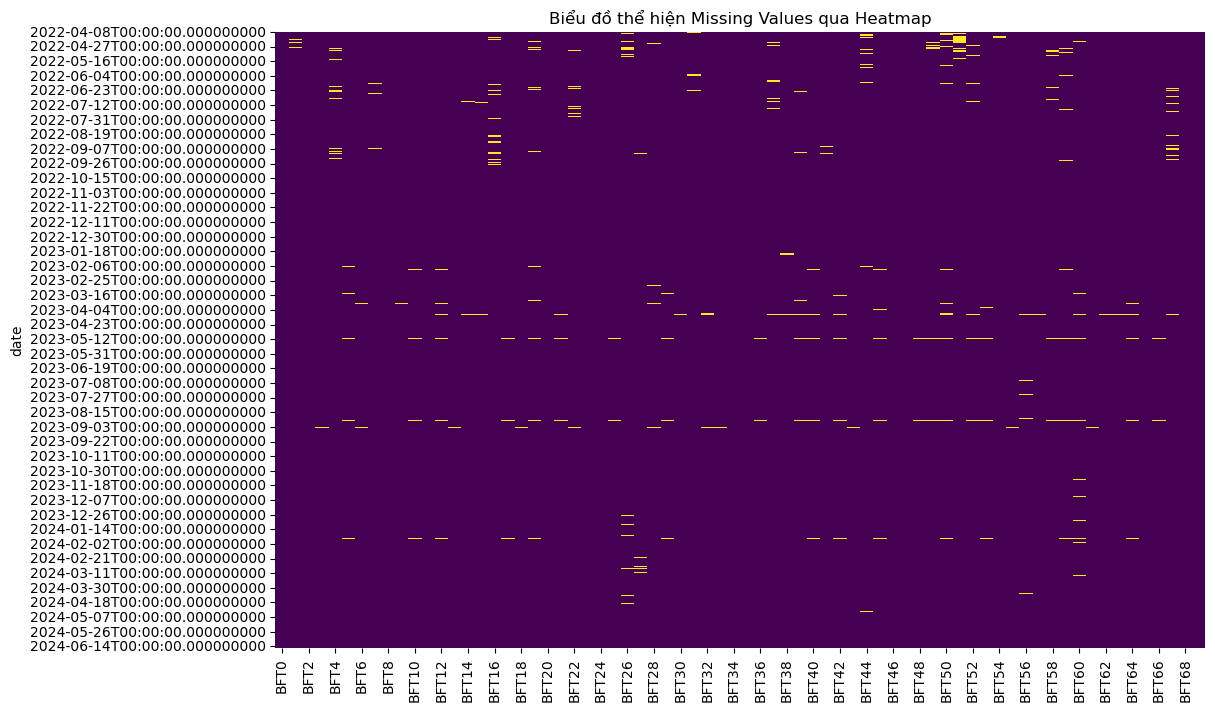

In [7]:
plt.figure(figsize=(12, 8))
sns.heatmap(new_dataframe.isnull(), cbar=False, cmap='viridis')
plt.title('Biểu đồ thể hiện Missing Values qua Heatmap')
plt.show()

In [8]:
new_dataframe['missing_count'] = new_dataframe.isnull().sum(axis=1)
# Sắp xếp DataFrame dựa trên cột 'missing_count'
new_dataframe_sorted = new_dataframe.sort_values(by='missing_count', ascending=False)
# Xóa 7 hàng đầu tiên
new_dataframe = new_dataframe_sorted.iloc[7:]
new_dataframe.drop(columns=['missing_count'], inplace=True)
new_dataframe = new_dataframe.sort_index(ascending=False)
new_dataframe

C:\Users\LAPTOP\AppData\Local\Temp\ipykernel_1660\3955802293.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dataframe.drop(columns=['missing_count'], inplace=True)


,BFT0,BFT1,BFT2,BFT3,BFT4,BFT5,BFT6,BFT7,BFT8,BFT9,...,BFT60,BFT61,BFT62,BFT63,BFT64,BFT65,BFT66,BFT67,BFT68,NEU
date,,,,,,,,,,,,,,,,,,,,,
2024-06-15,9.405498e+06,447591.90000,4.550273e+06,4.778631e+06,1.249979e+07,1.860285e+06,2.874460e+06,82305.000000,4.372459e+06,56948.660825,...,301300.924450,8.123089e+06,439200.000000,1.659491e+07,64044.798000,2.783154e+07,9.783055e+06,182368.12500,5.254894e+07,4.746420e+15
2024-06-14,1.410641e+07,438699.95000,2.932783e+06,3.413046e+06,6.912096e+06,1.354685e+06,1.713825e+06,136305.000000,3.585547e+06,19045.583425,...,145971.567762,3.442902e+06,416067.200000,1.211463e+07,68894.489900,1.728598e+07,6.470775e+06,138923.77500,5.721174e+07,1.410879e+15
2024-06-13,5.687811e+06,331395.60000,4.305214e+06,3.464571e+06,1.261798e+07,1.209259e+06,2.087222e+06,93581.250000,3.120351e+06,22109.175687,...,300949.678125,5.650850e+06,318027.262500,1.115155e+07,49528.255744,1.528535e+07,4.854776e+06,427611.76875,3.955868e+07,4.650834e+15
2024-06-12,3.974663e+06,142860.01875,2.611456e+06,2.677620e+06,1.004139e+07,6.460914e+05,3.658865e+06,73523.700000,2.956866e+06,15874.878000,...,239189.119825,2.489936e+06,567301.525000,1.655449e+07,57472.379663,1.230053e+07,5.735515e+06,190027.33750,3.719250e+07,1.490204e+15
2024-06-11,4.772902e+06,408872.81250,4.825279e+06,4.777669e+06,7.962866e+06,1.516166e+06,2.368230e+06,42431.250000,6.121570e+06,1881.209375,...,404651.700000,4.108086e+06,633453.125000,1.527397e+07,62680.241850,1.616902e+07,6.418407e+06,172677.50000,3.937842e+07,2.137809e+15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-12,9.561390e+05,23467.50000,1.055438e+05,3.204268e+06,9.387677e+03,2.359620e+04,3.720404e+06,9587.591775,4.265991e+05,438.055625,...,18218.296875,7.039539e+04,59223.964500,3.028272e+05,70437.150000,7.236122e+05,2.444636e+04,4452.50000,5.108134e+05,5.474164e+12
2022-04-11,9.097270e+05,10531.87500,8.107807e+04,7.084317e+05,2.186180e+04,7.102452e+04,4.867305e+06,11276.027200,7.440961e+05,66925.302187,...,9883.290625,2.708667e+04,446175.019500,4.303445e+05,44026.801875,2.229518e+06,6.041810e+04,1216.25000,5.044946e+05,8.033959e+12
2022-04-10,2.342390e+05,3990.00000,5.102927e+04,2.373839e+05,8.543925e+03,6.999589e+04,5.519673e+06,6772.740000,8.090279e+05,20410.366387,...,19156.984375,1.466110e+05,154199.350375,2.716330e+05,64513.243750,1.043176e+06,1.083494e+05,34278.75000,1.688751e+06,6.519689e+12


In [9]:
# Điền missing value
new_dataframe = new_dataframe.interpolate(method='time')
# Kiểm tra liệu còn giá trị thiếu nào không
print(new_dataframe.isnull().sum())


BFT0     0
BFT1     0
BFT2     0
BFT3     0
BFT4     0
        ..
BFT65    0
BFT66    0
BFT67    0
BFT68    0
NEU      0
Length: 70, dtype: int64


In [10]:

X = new_dataframe.drop(columns=['NEU'])
y= new_dataframe['NEU']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tạo mô hình hồi quy tuyến tính
model = make_pipeline(  
    PolynomialFeatures(degree=2),    
    LinearRegression()               
)
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)
y_pred = pd.DataFrame(data=y_pred, index=X_test.index, columns=['NEU'])
# Đánh giá mô hình bằng cách tính MSE trên tập kiểm tra
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE) trên tập kiểm tra:", mse)

Mean Squared Error (MSE) trên tập kiểm tra: 2.411316315985408e+25


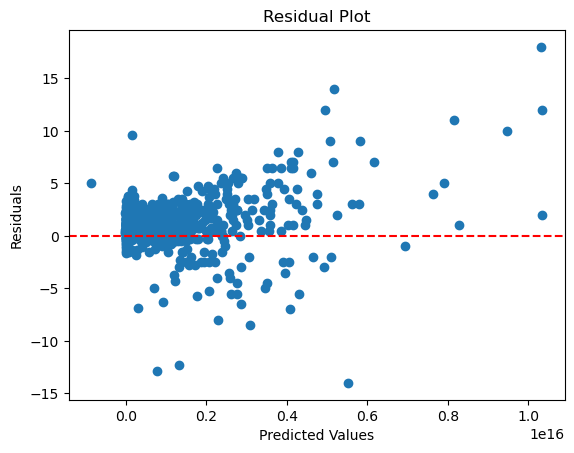

In [11]:
import numpy as np

y_pred1 = model.predict(X_train)

# Tính residuals
residuals = y_train - y_pred1
import matplotlib.pyplot as plt

plt.scatter(y_pred1, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


In [12]:
from scipy import stats
# Tính Z-score cho residuals
z_scores = np.abs(stats.zscore(residuals))

# Đánh dấu outliers
outliers = z_scores > 3
X_train_clean = X_train[~outliers]
y_train_clean = y_train[~outliers]
model.fit(X_train_clean, y_train_clean)
from sklearn.metrics import mean_squared_error

y_pred1 = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred1)
print("Mean Squared Error:", mse)
y_pred1 = pd.DataFrame(y_pred1, columns=['Predicted'],index=X_test.index)

Mean Squared Error: 2.7917619630467977e+25


In [13]:
y_pred

,NEU
date,
2024-01-30,1.631413e+15
2023-11-29,1.659551e+15
2022-06-01,8.004541e+13
2022-11-05,5.646299e+14
2022-08-25,3.731406e+13
...,...
2022-06-04,-1.859067e+13
2022-05-11,7.138788e+13
2022-12-17,4.646489e+14


In [14]:
y_pred1

,Predicted
date,
2024-01-30,1.631302e+15
2023-11-29,1.659550e+15
2022-06-01,7.948586e+13
2022-11-05,5.651694e+14
2022-08-25,3.732915e+13
...,...
2022-06-04,-1.842453e+13
2022-05-11,7.139594e+13
2022-12-17,4.652698e+14


In [15]:
df1 = pd.DataFrame({
    'y_train': y_train
})
df2 = pd.DataFrame({
    'y_test': y_test})
merged_df = df1.merge(df2, how='outer', left_index=True, right_index=True)
df3 = merged_df.merge(y_pred1, how='outer', left_index=True, right_index=True)
df = df3.merge(y_pred,how='outer', left_index=True, right_index=True)
df

,y_train,y_test,Predicted,NEU
date,,,,
2022-04-08,5.347906e+12,NaN,NaN,NaN
2022-04-09,1.353127e+11,NaN,NaN,NaN
2022-04-10,6.519689e+12,NaN,NaN,NaN
2022-04-11,NaN,8.033959e+12,8.054020e+12,8.057770e+12
2022-04-12,NaN,5.474164e+12,5.564701e+12,5.535965e+12
...,...,...,...,...
2024-06-11,2.137809e+15,NaN,NaN,NaN
2024-06-12,1.490204e+15,NaN,NaN,NaN
2024-06-13,NaN,4.650834e+15,4.656209e+15,4.658842e+15


In [16]:
X_test_data = df_test
y_pred_test = model.predict(X_test_data)

In [17]:
y_pred_test

array([2.06987221e+15, 2.58363564e+15, 3.59990719e+15, 2.43228821e+15,
       3.69120205e+15, 7.16243729e+15, 4.39644517e+15, 2.80588790e+15,
       2.23641390e+15, 2.32162715e+15, 4.92044397e+15, 4.10537367e+15,
       1.41928342e+15, 1.75051735e+15, 3.70825953e+15, 1.83196859e+15,
       9.42686222e+14, 4.02325911e+15, 1.25319475e+15, 3.50918912e+15,
       1.24643704e+15, 1.30645765e+15, 1.78140619e+15, 1.16261289e+15,
       9.68007516e+14, 1.89762327e+15, 1.73941699e+15, 9.15887917e+14,
       2.04122219e+15, 8.07176156e+14, 1.99135125e+15, 2.66456401e+15,
       1.41117845e+15, 8.20535805e+14, 1.70992110e+15, 2.15331260e+15,
       1.22592664e+15, 3.25354612e+15, 1.25359038e+15, 1.82076828e+15,
       1.90125336e+15, 3.06734411e+15, 8.85543199e+15, 1.96984928e+15,
       2.78295572e+15, 2.04247270e+15, 5.18684051e+15, 1.13471131e+15,
       1.18733940e+15, 3.89948943e+15, 1.09190131e+16, 2.83050543e+15,
       4.85805684e+15, 1.38664026e+15, 4.08343563e+15, 3.22404745e+15,
      

In [18]:
# Hiển thị tất cả giá trị dự đoán trên tập test_data
print("Dự đoán giá NEU trên tập test_data:")
for prediction in y_pred_test:
    print(prediction)

Dự đoán giá NEU trên tập test_data:
2069872214610085.0
2583635635918296.0
3599907191743694.5
2432288208048986.0
3691202045042387.0
7162437287595968.0
4396445171297799.5
2805887901940389.0
2236413903094431.5
2321627154531556.5
4920443970915100.0
4105373674582815.5
1419283417178237.2
1750517354110368.8
3708259532913860.5
1831968586022727.0
942686221745098.1
4023259111673612.5
1253194753180074.5
3509189123992403.5
1246437039707186.0
1306457650943401.8
1781406191917567.0
1162612891219669.5
968007516412497.9
1897623274453147.5
1739416989713710.5
915887917299718.5
2041222189297715.5
807176155953050.2
1991351245799270.2
2664564011290016.0
1411178454652229.8
820535804990044.1
1709921104977372.5
2153312596526408.8
1225926639580839.2
3253546119770721.5
1253590383558403.0
1820768284082623.2
1901253364270993.5
3067344107490944.5
8855431991893052.0
1969849283114910.0
2782955716057575.0
2042472704572192.5
5186840514891010.0
1134711308474453.2
1187339395687430.5
3899489426350469.0
1.0919013069760974e